# 其他的技術指標（２）

## 程式實作：繪製與計算能量潮指標

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

#### 讀取看盤軟體匯出資料

In [2]:
##### 使用2022年3月11日到2023年7月12日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day23(1).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10','OBV'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','OBV'])

# 保存OBV指標
df_obv = df.drop(columns=['開盤價','最高價','最低價','收盤價','SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','成交量','MA5','MA10'])

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將OBV指標的Columns的名稱由中文改為英文
df_obv = df_obv.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將OBV指標的Date設為Index
df_obv.set_index(df_obv['Date'],inplace=True)
df_obv = df_obv.drop(columns=['Date'])

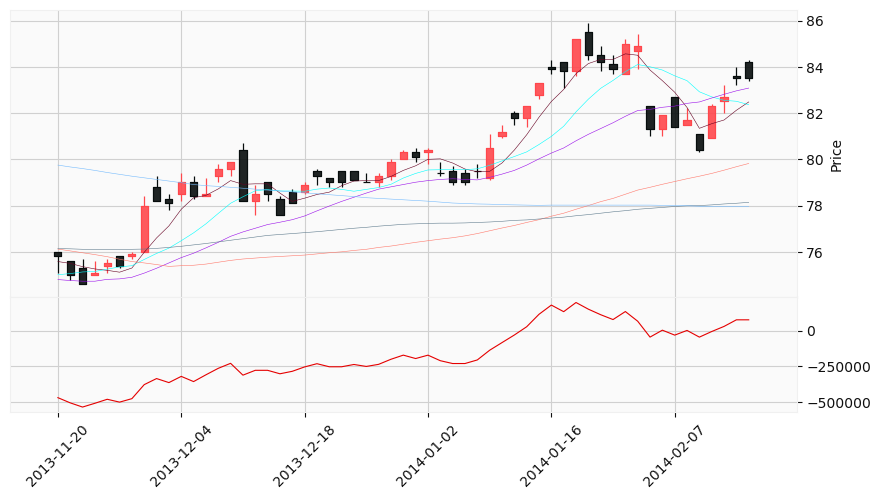

In [3]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與KD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue'),
    'OBV': mpf.make_addplot(df_obv['OBV'],width=0.8,panel=1,color='xkcd:red')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 使用talib套件計算ＯＢＶ指標

In [4]:
from talib.abstract import *

# 當使用talib Abstract API時，DataFrame欄位名稱需為小寫
# 請參考書籍：Python：量化交易 Ta-Lib 技術指標 139個活用技巧
df_k_line_talib = df_k_line.copy()
df_k_line_talib.columns=[ i.lower() for i in df_k_line_talib.columns]

In [5]:
talib_obv = OBV( df_k_line_talib)

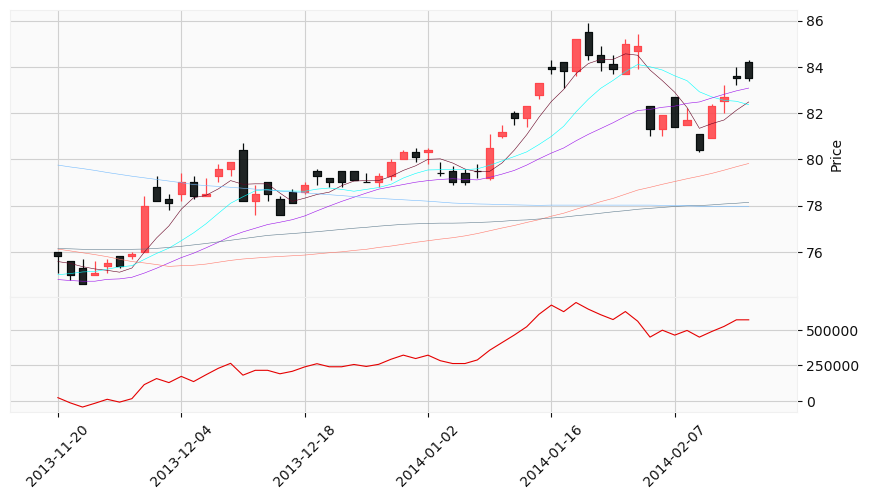

In [6]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與OBV指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue'),
    'OBV': mpf.make_addplot(talib_obv,width=0.8,panel=1,secondary_y=False,color='xkcd:red'),
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

## 程式實作：繪製與計算乖離率指標

#### 讀取看盤軟體匯出資料

In [7]:
##### 使用2022年3月11日到2023年7月12日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day23(2).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10','乖離率20','乖離率20.1','乖離率20.2'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','乖離率20','乖離率20.1','乖離率20.2'])

# 保存乖離率指標
df_bias = df.drop(columns=['開盤價','最高價','最低價','收盤價','SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','成交量','MA5','MA10','乖離率20.1','乖離率20.2'])
df_bias['乖離率20'] = df_bias['乖離率20'] * 100.0

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將乖離率指標的Columns的名稱由中文改為英文
df_bias = df_bias.rename(columns={'時間':'Date','乖離率20':'BIAS20'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將乖離率指標的Date設為Index
df_bias.set_index(df_bias['Date'],inplace=True)
df_bias = df_bias.drop(columns=['Date'])

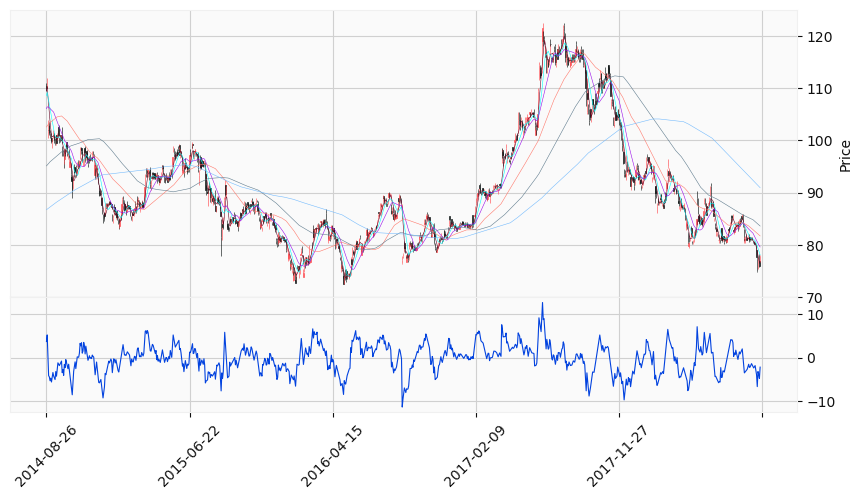

In [8]:
import warnings
warnings.filterwarnings( "ignore", module = "mplfinance\..*" )

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與DMI指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue'),
    'BIAS': mpf.make_addplot(df_bias['BIAS20'],width=0.8,panel=1,secondary_y=False,color='xkcd:blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 寫程式計算乖離率指標

In [9]:
bias_20 = (df_k_line['Close'] - df_k_line['Close'].rolling(20, min_periods=1).mean())/ df_k_line['Close'].rolling(20, min_periods=1).mean()*100
bias_20 = round(bias_20,2)

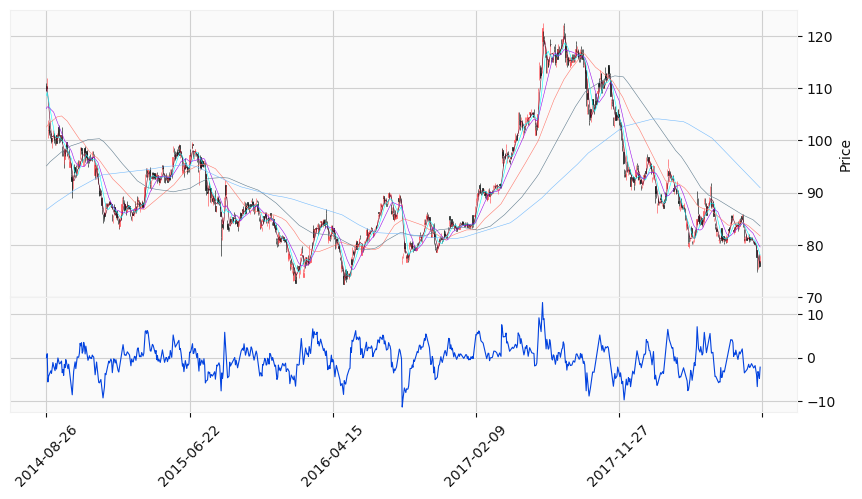

In [10]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與DMI指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA60": mpf.make_addplot(df_sma['SMA60'],width=0.4,color='xkcd:salmon'),
    "SMA120": mpf.make_addplot(df_sma['SMA120'],width=0.4,color='xkcd:blue grey'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue'),
    'BIAS': mpf.make_addplot(bias_20.values,width=0.8,panel=1,secondary_y=False,color='xkcd:blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

In [11]:
# 比對看盤軟體的乖離率與Python程式計算
# 注意：浮點數因為會有計算誤差，因此比對不能用numpy.equal
# 另外，只比較到小數點兩位(看盤軟體只有小數點兩位)
if np.allclose( np.array(df_bias['BIAS20']), np.array(bias_20.values), atol=1e-02, equal_nan=True) is False :
    np_diff = np.isclose(np.array(df_bias['BIAS20']), np.array(bias_20.values), atol=1e-02 , equal_nan=True)
    for idx in range( 0, len(np_diff)) :
        if np_diff[idx] == False :
            print('日期{}比對結果不同：看盤軟體 {:.2f}， {}'.format(df_bias.iloc[idx].name.strftime('%Y-%m-%d'),df_bias.iloc[idx]['BIAS20'],bias_20.iloc[idx]))
else :
    print('比對結果相同')

日期2014-08-26比對結果不同：看盤軟體 3.70， 0.0
日期2014-08-27比對結果不同：看盤軟體 5.21， 0.9
日期2014-08-28比對結果不同：看盤軟體 -4.11， -5.56
日期2014-08-29比對結果不同：看盤軟體 -4.11， -4.23
日期2014-09-01比對結果不同：看盤軟體 -4.40， -3.79
日期2014-09-02比對結果不同：看盤軟體 -5.28， -3.98
日期2014-09-03比對結果不同：看盤軟體 -4.69， -3.02
日期2014-09-04比對結果不同：看盤軟體 -5.57， -3.58
日期2014-09-05比對結果不同：看盤軟體 -4.92， -2.68
日期2014-09-09比對結果不同：看盤軟體 -3.40， -1.11
日期2014-09-10比對結果不同：看盤軟體 -4.19， -1.89
日期2014-09-11比對結果不同：看盤軟體 -4.87， -2.63
日期2014-09-12比對結果不同：看盤軟體 -5.01， -2.97
日期2014-09-15比對結果不同：看盤軟體 -3.18， -1.31
日期2014-09-16比對結果不同：看盤軟體 -4.25， -2.6
日期2014-09-17比對結果不同：看盤軟體 -2.45， -1.06
日期2014-09-18比對結果不同：看盤軟體 -1.18， -0.07
日期2014-09-19比對結果不同：看盤軟體 -1.79， -1.0
日期2014-09-22比對結果不同：看盤軟體 -1.82， -1.41
